<a href="https://colab.research.google.com/github/PiotrPogorzelski01/Praca_dyplomowa/blob/main/Licencjat_prod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Temat pracy licencjackiej**:

---


#Z*astosowanie wybranych metod uczenia statystycznego i maszynowego w analizie cen nieruchomości.*

## Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import sklearn as sk
import tensorflow

import scipy.stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',60)

***Moim zadaniem jest wybranie najlepszego algorytmu uczenia maszynowego, który przewiduję ceny nieruchomości ***

## Dawnload data

In [2]:
df_august=pd.read_csv(r"/content/drive/MyDrive/DataSet/apartments_pl_2023_08.csv")
df_september=pd.read_csv(r"/content/drive/MyDrive/DataSet/apartments_pl_2023_09.csv")
df_october=pd.read_csv(r"/content/drive/MyDrive/DataSet/apartments_pl_2023_10.csv")
df_november=pd.read_csv(r"/content/drive/MyDrive/DataSet/apartments_pl_2023_11.csv")

In [3]:
# Printing the shapes of DataFrames
print('8:', df_august.shape)
print('9:', df_september.shape)
print('10:', df_october.shape)
print('11:', df_november.shape)

8: (18905, 28)
9: (16997, 28)
10: (16690, 28)
11: (16302, 28)


In [4]:
# List containing DataFrames to concatenate
frames = [df_august, df_september, df_october, df_november]

# Concatenating DataFrames
df = pd.concat(frames)

## Take a look at the Data Structure

In [5]:
#display the first few rows of a DataFrame.
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,1.389,0.628,0.105,1.652,NaN,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,0.291,0.348,1.404,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,0.246,0.300,1.857,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,0.359,0.101,0.310,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,0.704,0.501,2.138,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


In [6]:
df.shape

(68894, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68894 entries, 0 to 16301
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    68894 non-null  object 
 1   city                  68894 non-null  object 
 2   type                  53616 non-null  object 
 3   squareMeters          68894 non-null  float64
 4   rooms                 68894 non-null  float64
 5   floor                 56422 non-null  float64
 6   floorCount            67938 non-null  float64
 7   buildYear             56959 non-null  float64
 8   latitude              68894 non-null  float64
 9   longitude             68894 non-null  float64
 10  centreDistance        68894 non-null  float64
 11  poiCount              68894 non-null  float64
 12  schoolDistance        68825 non-null  float64
 13  clinicDistance        68575 non-null  float64
 14  postOfficeDistance    68799 non-null  float64
 15  kindergartenDistanc

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,68894.0,58.944435,21.279593,25.000000,44.492500,55.000000,69.000000,1.500000e+02
rooms,68894.0,2.685212,0.911641,1.000000,2.000000,3.000000,3.000000,6.000000e+00
floor,56422.0,3.305431,2.506487,1.000000,2.000000,3.000000,4.000000,2.900000e+01
floorCount,67938.0,5.221172,3.270862,1.000000,3.000000,4.000000,6.000000,2.900000e+01
buildYear,56959.0,1984.586527,34.058699,1850.000000,1965.000000,1991.000000,2014.000000,2.023000e+03
latitude,68894.0,52.045462,1.339131,49.978999,51.114026,52.195312,52.440563,5.460646e+01
longitude,68894.0,19.501237,1.781489,14.447127,18.523780,19.899315,20.994734,2.320713e+01
centreDistance,68894.0,4.342607,2.873857,0.020000,1.990000,3.940000,6.120000,1.694000e+01
poiCount,68894.0,20.337460,23.816947,0.000000,7.000000,13.000000,24.000000,2.080000e+02
schoolDistance,68825.0,0.416781,0.479851,0.004000,0.175000,0.290000,0.468000,4.818000e+00


## Data Cleaning

In [9]:
def calculate_missing_data(dataframe):
    """
    This function calculates the total missing values and the percentage of total
    missing values for each column in the provided dataframe.

    Parameters:
    dataframe (DataFrame): The dataframe to analyze.

    Returns:
    DataFrame: A dataframe containing the total missing values and percentage of total
    missing values for each column.
    """
    missing_data_info = []

    for column in dataframe.columns:
        total_missing_values = dataframe[column].isnull().sum()
        percentage_missing_values = round((total_missing_values / dataframe.shape[0]) * 100, 2)

        missing_data_info.append({
            "ColumnName": column,
            "TotalMissingValues": total_missing_values,
            "PercentageMissing": percentage_missing_values,
            "Datatype":dataframe[column].dtype
        })

    missing_data_df = pd.DataFrame(missing_data_info)
    return missing_data_df


missing_data_df = calculate_missing_data(df)

# Display columns with missing values
missing_columns_df = missing_data_df[missing_data_df['PercentageMissing'] > 0.0]
display(missing_columns_df)

print('\n')
print(f"Number of columns with missing values: {missing_columns_df.shape[0]}")

,ColumnName,TotalMissingValues,PercentageMissing,Datatype
2,type,15278,22.18,object
5,floor,12472,18.10,float64
6,floorCount,956,1.39,float64
7,buildYear,11935,17.32,float64
12,schoolDistance,69,0.10,float64
13,clinicDistance,319,0.46,float64
14,postOfficeDistance,95,0.14,float64
15,kindergartenDistance,68,0.10,float64
16,restaurantDistance,193,0.28,float64
17,collegeDistance,2021,2.93,float64




Number of columns with missing values: 14


In [10]:
# Dropping id and columns which have very high number of missing values, being impossible to apply techniques such as imputation
df.drop(['id','type','floor','buildYear','condition','buildingMaterial','ownership'],axis=1,inplace=True)
# Dropping duplicates if any
df=df.dropna()

In [11]:
df.shape

(62692, 21)

In [12]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
city                    0
squareMeters            0
rooms                   0
floorCount              0
latitude                0
longitude               0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
hasParkingSpace         0
hasBalcony              0
hasElevator             0
hasSecurity             0
hasStorageRoom          0
price                   0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [13]:
df.shape

(62692, 21)

## Discover and Visualize the Data to Gain Insights

In [14]:
df1=df.copy()

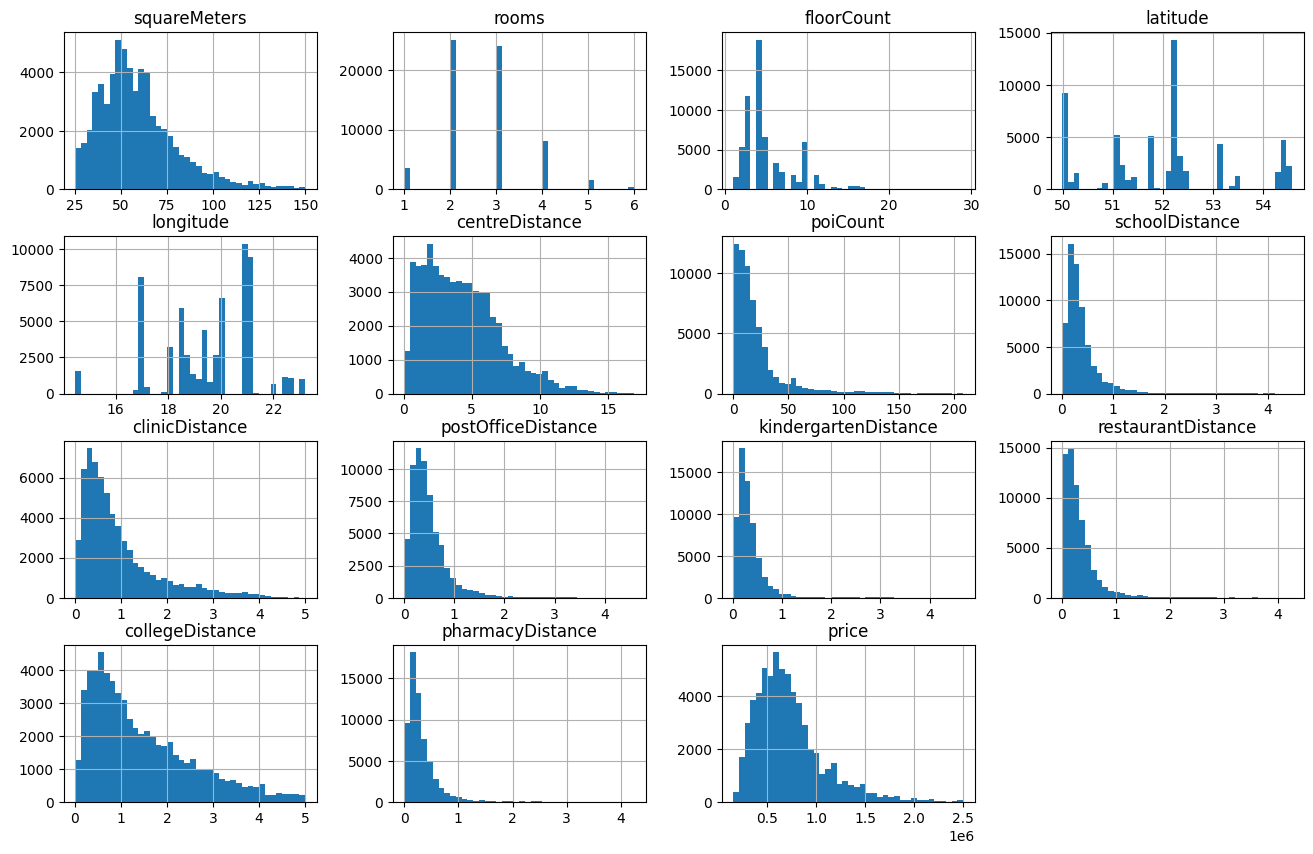

In [15]:
df1.hist(bins=40,figsize=(16,10))
plt.ticklabel_format(style='plain')
plt.show()

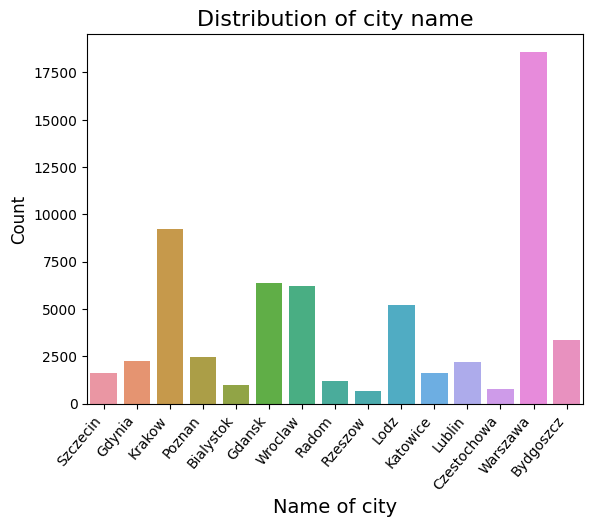

In [16]:
# Create the plot
sns.countplot(data=df1,x='city')

# Set the title and labels
plt.title('Distribution of city name', fontsize=16)
plt.xlabel('Name of city', fontsize=14)
plt.ylabel('Count', fontsize=12)

# Rotate the x-axis labels
plt.xticks(rotation=50)

# Modify x-axis tick labels to start with uppercase letter
plt.gca().set_xticklabels([label.get_text().title() for label in plt.gca().get_xticklabels()])

# Move x-axis tick labels to the right
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), ha='right')

# Show the plot
plt.show()

When it comes to the price of an apartment, in Warszawa we have to pay an average of PLN 957715.0


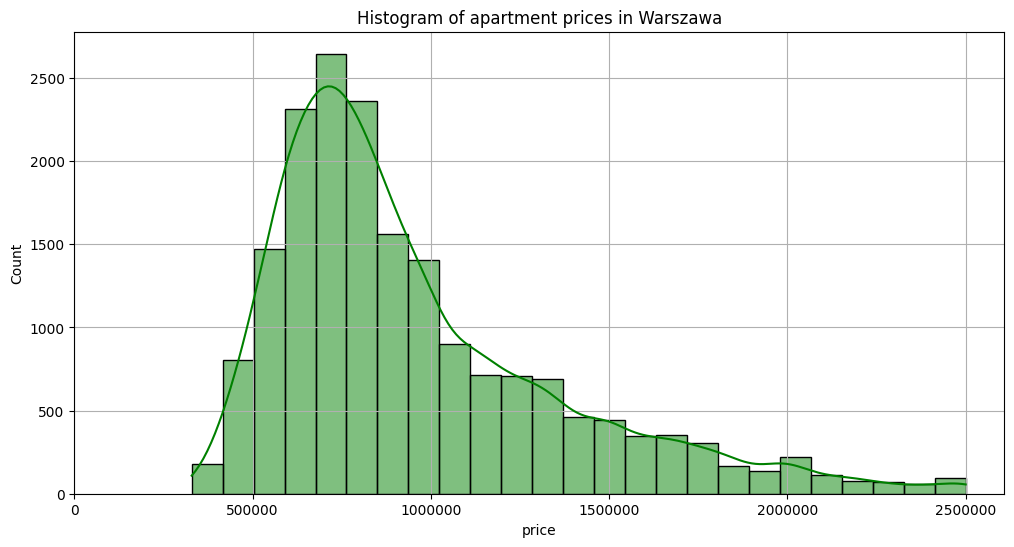

In [17]:
df_Warszawa=df1[df1['city']=='warszawa']
plt.figure(figsize=(12, 6))
g = sns.histplot(x='price', data=df_Warszawa, bins=25, color='green', kde=True)
g.set(xlim=(0, None))
g.set_title('Histogram of apartment prices in Warszawa')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)
average_price = round(df_Warszawa['price'].mean(), 0)
print(f"When it comes to the price of an apartment, in Warszawa we have to pay an average of PLN {average_price}")
plt.show()

## Looking for Correlations

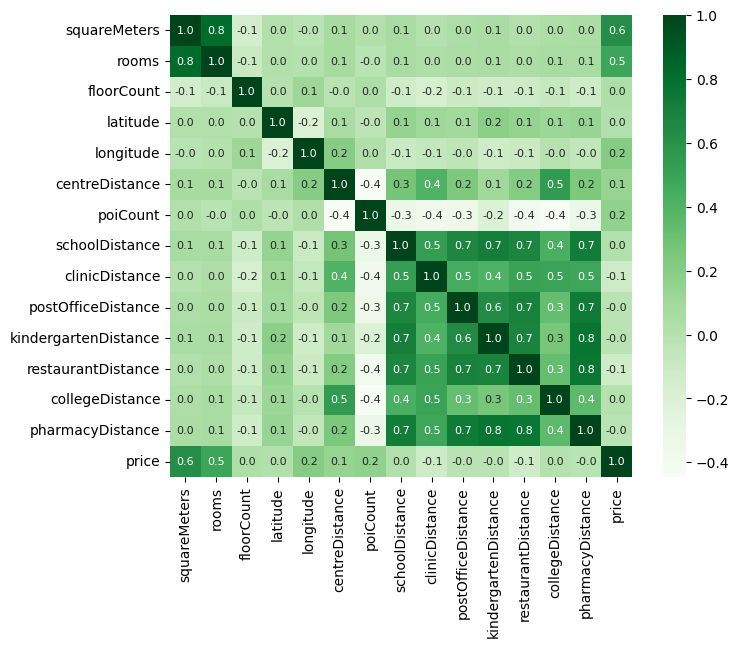

In [18]:
#create corelation matrix
df_corr=df1.select_dtypes(include=['int64','float64']).corr()
# Set the size of the figure
plt.figure(figsize=(8,6))

# Compute the correlation matrix from the DataFrame
df_corr=df1.select_dtypes(include=['int64','float64']).corr()

# Define the properties for the heatmap
heatmap_properties = {
    'cbar': True,  # Show a colorbar
    'square': True,  # Each cell will be square-shaped
    'fmt': '.1f',  # Format the annotation to one decimal place
    'annot': True,  # Annotate the cells with their values
    'annot_kws': {'size': 8},  # Increase the annotation size for better visibility
    'cmap': 'Greens'  # Use the Greens color map
}

# Create the heatmap
sns.heatmap(df_corr, **heatmap_properties)

# Show the plot
plt.show()

In [19]:
# Assuming 'df' is your DataFrame and 'price' is a column in 'df'

# Selecting numeric columns
numeric_cols = df1.select_dtypes(include=['int64', 'float64'])

# Check if 'price' column exists in the DataFrame
if 'price' in df1.columns:
    # Calculate correlation of numeric columns with 'price'
    correlation = numeric_cols.corrwith(df1['price'])
    print(correlation.sort_values(ascending=False))
else:
    print("'price' column not found in the DataFrame.")

price                   1.000000
squareMeters            0.626307
rooms                   0.486787
longitude               0.207860
poiCount                0.167070
centreDistance          0.140046
floorCount              0.030160
latitude                0.013894
schoolDistance          0.012708
collegeDistance         0.007086
pharmacyDistance       -0.011996
postOfficeDistance     -0.019892
kindergartenDistance   -0.019975
clinicDistance         -0.116064
restaurantDistance     -0.129744
dtype: float64


## Log Transform for Skewed Features

In [20]:
df2=df1.copy()

In [21]:
#It computes the absolute value of the skewness for each feature
skew_df=pd.DataFrame(df2.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew']=skew_df['Feature'].apply(lambda feature:scipy.stats.skew(df2[feature]))
skew_df['Absolute Skew']=skew_df['Skew'].apply(abs)
skew_df['Skewed']=skew_df['Absolute Skew'].apply(lambda x: True if x>=0.5 else False)
skew_df=skew_df[skew_df['Feature']!='price']
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,squareMeters,1.158897,1.158897,True
1,rooms,0.625132,0.625132,True
2,floorCount,1.790760,1.790760,True
3,latitude,0.258634,0.258634,False
4,longitude,-0.527382,0.527382,True
5,centreDistance,0.848522,0.848522,True
6,poiCount,2.808409,2.808409,True
7,schoolDistance,3.814336,3.814336,True
8,clinicDistance,1.679580,1.679580,True
9,postOfficeDistance,2.982687,2.982687,True


In [22]:
# Iterate through each column in skew_df where the 'Skewed' column is True
for column in skew_df.query('Skewed==True')['Feature'].values:
    # Apply a logarithm transformation (using np.log1p) to the corresponding column in df3
    df2[column] = np.log1p(df2[column])

## Handling Text and Categorical Attributes

In [23]:
df3=df2.copy()

In [24]:
df3.select_dtypes(include=['object']).describe()

,city,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom
count,62692,62692,62692,62692,62692,62692
unique,15,2,2,2,2,2
top,warszawa,no,yes,no,no,no
freq,18599,45699,37426,33029,55867,32420


In [25]:
# Importing necessary libraries
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# Create an instance of OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit the OneHotEncoder to the 'city' column of the dataframe and transform it
# The transformed data is stored in one_hot_encoded1
one_hot_encoded1 = one_hot_encoder.fit_transform(df3[['city']])

# Create a new dataframe from one_hot_encoded1 with columns set to the categories of the 'city' column
# Reset the index of the new dataframe
one_hot_df = pd.DataFrame(one_hot_encoded1, columns=one_hot_encoder.categories_[0]).reset_index(drop=True)

# Reset the index of the orginal dataframe
df3=df3.reset_index(drop=True)

# Concatenate the orginal df and one-hot encoded dataframe
df4=pd.concat([df3,one_hot_df],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
one_hot_encoded3 = one_hot_encoder.fit_transform(df3[['hasParkingSpace']])
df5 = pd.concat([df4, pd.DataFrame(one_hot_encoded3, columns=one_hot_encoder.categories_[0])], axis=1)
df5.rename(columns = {'no':'NoParkingSpace'}, inplace = True)
df5.rename(columns = {'yes':'YesParkingSpace'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
one_hot_encoded4 = one_hot_encoder.fit_transform(df[['hasElevator']])
df6 = pd.concat([df5, pd.DataFrame(one_hot_encoded3, columns=one_hot_encoder.categories_[0])], axis=1)
df6.rename(columns = {'no':'NoElevator'}, inplace = True)
df6.rename(columns = {'yes':'HaveElevator'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
one_hot_encoded5 = one_hot_encoder.fit_transform(df[['hasBalcony']])
df7= pd.concat([df6, pd.DataFrame(one_hot_encoded5, columns=one_hot_encoder.categories_[0])], axis=1)
df7.rename(columns = {'no':'NoBalcony'}, inplace = True)
df7.rename(columns = {'yes':'HasBalcony'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
one_hot_encoded6 = one_hot_encoder.fit_transform(df[['hasSecurity']])
df8 = pd.concat([df7, pd.DataFrame(one_hot_encoded6, columns=one_hot_encoder.categories_[0])], axis=1)
df8.rename(columns = {'no':'NoSecurity'}, inplace = True)
df8.rename(columns = {'yes':'HasSecurity'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
one_hot_encoded7 = one_hot_encoder.fit_transform(df[['hasStorageRoom']])
df9 = pd.concat([df8, pd.DataFrame(one_hot_encoded7, columns=one_hot_encoder.categories_[0])], axis=1)
df9.rename(columns = {'no':'NoStorageRoom'}, inplace = True)
df9.rename(columns = {'yes':'HasStorageRoom'}, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
df9.drop(['NoStorageRoom','NoSecurity','NoBalcony','NoElevator','NoParkingSpace'], axis=1, inplace=True)

In [32]:
df9.shape

(62692, 41)

## Feature Scaling

In [33]:
df10=df9.copy()

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
df10.drop('price',axis=1,inplace=True)

In [36]:
df10=df10.select_dtypes(include=['float64','int64'])

In [37]:
# Initialize the StandardScaler
scaler = StandardScaler()
scaler.fit(df10)
# Transform the data using the fitted scaler and store it in a DataFrame
df10 = pd.DataFrame(scaler.transform(df10), index=df10.index, columns=df10.columns)

## Target Transformation

In [38]:
target=df['price']

<ipython-input-39-098b040da384>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde=True, fit=scipy.stats.norm)
<ipython-input-39-098b040da384>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)


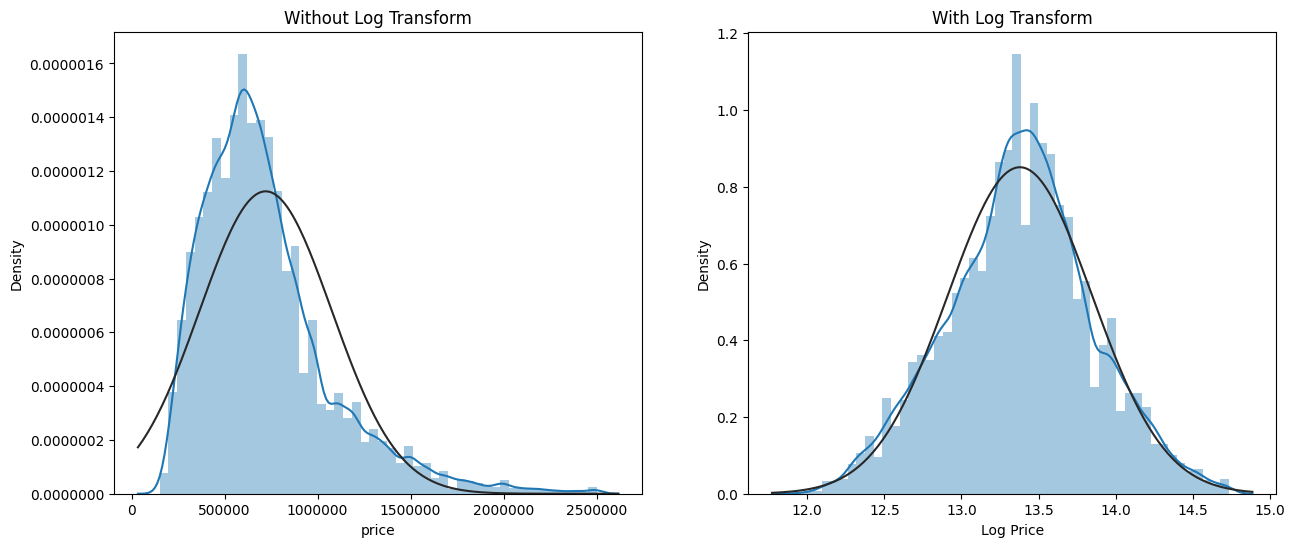

In [39]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")
plt.gca().ticklabel_format(style='plain')

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.title('With Log Transform')
plt.xlabel('Log Price')
plt.gca().ticklabel_format(style='plain')

plt.show()

In [40]:
log_target=np.log(target)

## Train and Test Sets

In [41]:
df11=df10.copy()

In [42]:
# Prepare X and y

X=df11
y=log_target
print('Shape of X:', X.shape)
print('Shape od y:',y.shape)

Shape of X: (62692, 34)
Shape od y: (62692,)


In [43]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("shape of original dataset :", df11.shape)
print("shape of X_train", X_train.shape)
print("shape of y_train", y_train.shape)
print("shape of X_test", X_test.shape)
print("shape of y_test", y_test.shape)

shape of original dataset : (62692, 34)
shape of X_train (50153, 34)
shape of y_train (50153,)
shape of X_test (12539, 34)
shape of y_test (12539,)


In [44]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

## Select and Train a Model

In [45]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])


***Linear Regression ***

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [48]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     7065.
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:39:29   Log-Likelihood:                 9628.1
No. Observations:               50153   AIC:                        -1.919e+04
Df Residuals:                   50120   BIC:                        -1.890e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.3787 

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [50]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [51]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Check if the shapes of X_test and X_test_sm are as expected
if X_test.shape[1] == 37 and X_test_sm.shape[1] == 37:
    # If the shapes match, add a constant to X_test with 'has_constant' parameter set to 'add'
    X_test_sm = sm.add_constant(X_test, has_constant='add')

# Predict using the linear regression model 'lr' on the modified X_test_sm
predictions = lr.predict(X_test_sm)

In [52]:
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.15841894986517374
MSE: 0.039947989612538794
RMSE: 0.19986993173696435
R2 Score: 0.8181420123040496
------------------------------


<ipython-input-52-be699018c427>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


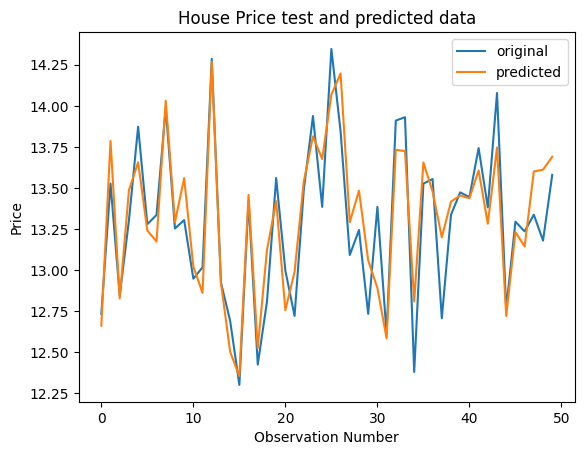

In [53]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, predictions[:number_of_observations], label="predicted")

plt.title("House Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

***Random Forest Regressor***


In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor(random_state = 42)
# Saving feature names for later use
feature_list=list(X.columns)

In [56]:
#Train the model on training data
rf.fit(X_train,y_train)
# Use the forest's predict method on the test data
predictions=rf.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.05643941403429842
MSE: 0.008525809340899615
RMSE: 0.0923353092857744
R2 Score: 0.9611873702468202
------------------------------


<ipython-input-56-f4b7f77b772d>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


**K-Nearest NeighborsRegressor**

In [57]:
from sklearn import neighbors
from math import sqrt

In [58]:
rmse_tab=[] # to store rmse values for diffrent k

for K in range(1,30,2):
  model=neighbors.KNeighborsRegressor(n_neighbors=K)

  model.fit(X_train,y_train) #fit the model
  predictions=model.predict(X_test) #make prediction on test set
  error=sqrt(mean_squared_error(y_test,predictions))
  rmse_tab.append(error)
  print('RMSE value for k=',K,'is:',error)

RMSE value for k= 1 is: 0.13788199658053327
RMSE value for k= 3 is: 0.1545054228035523
RMSE value for k= 5 is: 0.16937155844486493
RMSE value for k= 7 is: 0.17717951505813267
RMSE value for k= 9 is: 0.1813268904689855
RMSE value for k= 11 is: 0.18391274398930418
RMSE value for k= 13 is: 0.18623660748107743
RMSE value for k= 15 is: 0.1878081230343429
RMSE value for k= 17 is: 0.1891516471647093
RMSE value for k= 19 is: 0.19063267582181745
RMSE value for k= 21 is: 0.1918487626518777
RMSE value for k= 23 is: 0.19347944910578282
RMSE value for k= 25 is: 0.19470002429918612
RMSE value for k= 27 is: 0.195742120236009
RMSE value for k= 29 is: 0.19662591922129416


<Axes: >

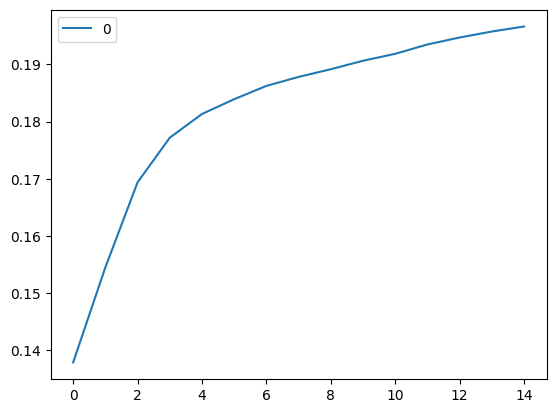

In [59]:
#plotting the rmse values against k values
plotTable=pd.DataFrame(rmse_tab)
plotTable.plot()

In [60]:
knn=neighbors.KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train) #fit the model
predictions=knn.predict(X_test) #make prediction on test set


mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "KNeighborsRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)



MAE: 0.061863833939136546
MSE: 0.01901144498103419
RMSE: 0.13788199658053327
R2 Score: 0.9134528880933233
------------------------------


<ipython-input-60-3f0107703aa6>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


**Extreme Gradient Boosting**



In [61]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
predictions=xgb_model.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.10399336129148665
MSE: 0.01844277857098162
RMSE: 0.13580419202285923
R2 Score: 0.916041667403759
------------------------------


<ipython-input-61-55b663d18d42>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


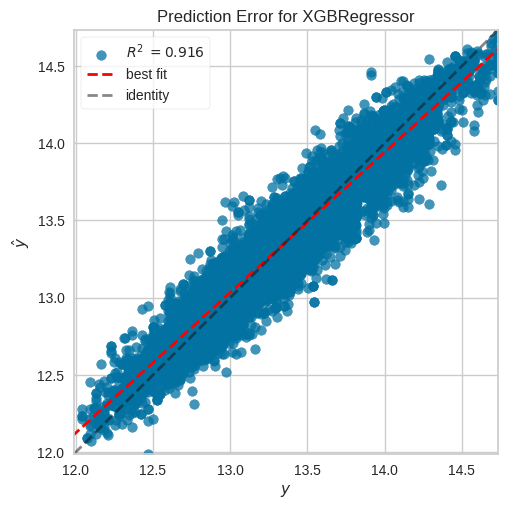

In [62]:
#Plotting the prediction errors
from yellowbrick.regressor import PredictionError
visualizer=PredictionError(xgb_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.ax.lines[0].set_color('red')

visualizer.poof()
plt.show()

**Neural network**

In [63]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [64]:
X_train.shape

(50153, 34)

In [65]:
model = keras.Sequential([
  layers.Dense(30, activation='relu', input_shape=(34,)),
  layers.Dense(30, activation='relu'),
  layers.Dense(1,activation=None)
])


In [66]:
# Compile the model with the Adam optimizer and the mean squared error loss function
model.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mae'])
# Fit the model to the training data, using the test data for validation
# The model will be trained for 300 epochs, and the batch size for each epoch is 128
history =model.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   epochs=300, batch_size=128)

Epoch 1/300
392/392 [==============================] - 2s 3ms/step - loss: 23.3247 - mae: 3.0289 - val_loss: 1.0931 - val_mae: 0.8153
Epoch 2/300
392/392 [==============================] - 1s 2ms/step - loss: 0.6932 - mae: 0.6427 - val_loss: 0.4434 - val_mae: 0.5152
Epoch 3/300
392/392 [==============================] - 1s 2ms/step - loss: 0.3244 - mae: 0.4392 - val_loss: 0.2375 - val_mae: 0.3774
Epoch 4/300
392/392 [==============================] - 1s 2ms/step - loss: 0.1856 - mae: 0.3323 - val_loss: 0.1459 - val_mae: 0.2947
Epoch 5/300
392/392 [==============================] - 1s 2ms/step - loss: 0.1213 - mae: 0.2686 - val_loss: 0.0998 - val_mae: 0.2438
Epoch 6/300
392/392 [==============================] - 1s 2ms/step - loss: 0.0890 - mae: 0.2304 - val_loss: 0.0781 - val_mae: 0.2153
Epoch 7/300
392/392 [==============================] - 1s 2ms/step - loss: 0.0715 - mae: 0.2073 - val_loss: 0.0640 - val_mae: 0.1960
Epoch 8/300
392/392 [==============================] - 1s 3ms/step -

In [67]:
predictions = model.predict(X_test)


mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "Artificial Neural Network","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

392/392 [==============================] - 1s 1ms/step
MAE: 0.1405326846539673
MSE: 0.0317089376836676
RMSE: 0.17807003589505901
R2 Score: 0.8556492165173164
------------------------------


<ipython-input-67-709ffc63998e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(new_row, ignore_index=True)


In [68]:
models.sort_values(by='R2 Score', ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
1,RandomForestRegressor,0.056439,0.008526,0.092335,0.961187
3,XGBRegressor,0.103993,0.018443,0.135804,0.916042
2,KNeighborsRegressor,0.061864,0.019011,0.137882,0.913453
4,Artificial Neural Network,0.140533,0.031709,0.178070,0.855649
0,LinearRegression,0.158419,0.039948,0.199870,0.818142
